In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df= pd.read_csv(r'C:\Users\Peng\Desktop\New folder\PreScreen_r3\ingredient.csv')
df

,genotype,a,b,c,d,e,f,g,h,i
0,A,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,B,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,A,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,B,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,B,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
209,B,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
210,A,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32
211,A,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00
212,B,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22


<AxesSubplot:xlabel='genotype', ylabel='value'>

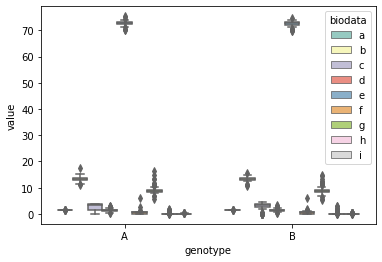

In [3]:
d_melt = pd.melt(df, id_vars=['genotype'], value_vars=['a','b','c','d','e','f','g','h','i'])
d_melt.columns = ['genotype', 'biodata', 'value']
sns.boxplot(x='genotype', y='value', hue='biodata', data=d_melt, palette='Set3')

In [4]:
model = ols('value ~ C(genotype) + C(biodata) + C(genotype):C(biodata)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(genotype),0.000031,1.0,0.000044,0.994703
C(biodata),943261.084445,8.0,168219.844177,0.000000
C(genotype):C(biodata),5.413198,8.0,0.965382,0.461331
Residual,1337.343818,1908.0,NaN,NaN


<AxesSubplot:xlabel='value', ylabel='biodata'>

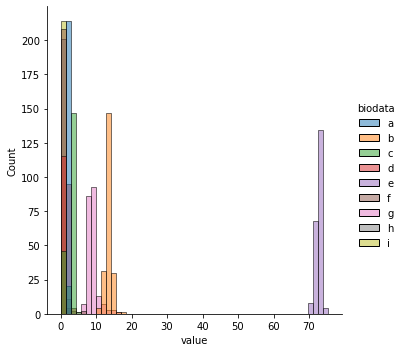

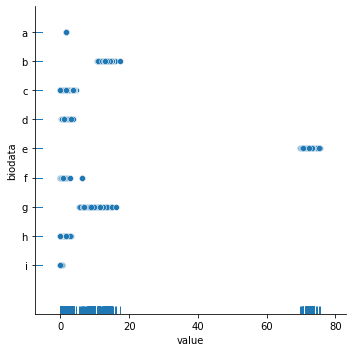

In [7]:
sns.displot(d_melt, x="value", hue="biodata")
sns.relplot(data=d_melt, x="value", y="biodata")
sns.rugplot(data=d_melt, x="value", y="biodata")